# Project: Investigate a Dataset (TMBD Movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    <ul>
    <li><a href="#limitations">Limitations</a></li>
    </ul>    
</ul>

<a id='intro'></a>
## Introduction

> In this project, an investigation of a tmbd movies database will be performed. The dataset is uploaded in a csv format. There are around 10.000 movies with various properties. 
> Potential questions we might pose: What are the caracteristics of the movies with the highest revenue? Does higher budget guarantee popularity? What period of time was the most successful for cinematography?

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [36]:
# importing libraries
# numpy to work with numeric data
# pandas to read csv files into a dataframe
# matplotlib to plot graphs to visualise the results

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# reading csv file and checking the first few lines

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [37]:
# checking how many rows and columns there are in the dataset

df.shape

(10821, 11)

> The dataset has 10866 rows and 21 columns. Let's check what columns are there and see their corresponding data types, since .head() function only shows us a few columns.

In [38]:
# getting information about each column, its data type, number of non-null rows

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10821 non-null  float64
 1   budget          10821 non-null  int64  
 2   revenue         10821 non-null  int64  
 3   original_title  10821 non-null  object 
 4   director        10821 non-null  object 
 5   runtime         10821 non-null  int64  
 6   vote_count      10821 non-null  int64  
 7   vote_average    10821 non-null  float64
 8   release_year    10821 non-null  int64  
 9   budget_adj      10821 non-null  float64
 10  revenue_adj     10821 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1014.5+ KB


### Data Cleaning

> Analysing Non-Null column, we can find which columns have missing values. Overall, there are 10866 rows in the database. However "cast", "homepage", "director", "tagline", "keywords", "overview", "genres", "production_companies" columns have some missing values. All of them have an object data type, meaning there are all strings. None of them are expected to be numeric, thus we do not need to worry about filling in these missing values.
> Now we can check the numeric values. 

In [39]:
# dropping unecessary columns with inplace=True to fix the changes

df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_date'], axis=1, inplace=True)

KeyError: "['id' 'imdb_id' 'cast' 'homepage' 'tagline' 'keywords' 'overview' 'genres'\n 'production_companies' 'release_date'] not found in axis"

In [40]:
# checking that the coluns were dropped successfully 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10821 non-null  float64
 1   budget          10821 non-null  int64  
 2   revenue         10821 non-null  int64  
 3   original_title  10821 non-null  object 
 4   director        10821 non-null  object 
 5   runtime         10821 non-null  int64  
 6   vote_count      10821 non-null  int64  
 7   vote_average    10821 non-null  float64
 8   release_year    10821 non-null  int64  
 9   budget_adj      10821 non-null  float64
 10  revenue_adj     10821 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1014.5+ KB


> Now we only have the necessary columns. We need to check the data for duplicates.

In [41]:
# checking how many duplicates we have

sum(df.duplicated())

0

> there is 1 duplicated row that needs to be dropped

In [43]:
# checking if the drop was successful, should be -1 row

df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10821 non-null  float64
 1   budget          10821 non-null  int64  
 2   revenue         10821 non-null  int64  
 3   original_title  10821 non-null  object 
 4   director        10821 non-null  object 
 5   runtime         10821 non-null  int64  
 6   vote_count      10821 non-null  int64  
 7   vote_average    10821 non-null  float64
 8   release_year    10821 non-null  int64  
 9   budget_adj      10821 non-null  float64
 10  revenue_adj     10821 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1014.5+ KB


> Some rows are missing "director" value, we should check what kind of information they contain.

In [44]:
# checking data with null "director" values

df[df.director.isnull()]

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj


> The rows with NaN director column mostly represent movies with a zero budget and short/zero screen time. Since the number of such movies is very small compared to the total number of movies in the dataset, we can drop these rows.

In [45]:
# dropping those rows and checking if the drop was successful

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10821 non-null  float64
 1   budget          10821 non-null  int64  
 2   revenue         10821 non-null  int64  
 3   original_title  10821 non-null  object 
 4   director        10821 non-null  object 
 5   runtime         10821 non-null  int64  
 6   vote_count      10821 non-null  int64  
 7   vote_average    10821 non-null  float64
 8   release_year    10821 non-null  int64  
 9   budget_adj      10821 non-null  float64
 10  revenue_adj     10821 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1014.5+ KB


> The data looks clean. We can start the analysis.

<a id='eda'></a>
## Exploratory Data Analysis

In [46]:
# starting the exploratory analysis with the overall descriptive statistics of the population

df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10821.000000,1.082100e+04,1.082100e+04,10821.000000,10821.000000,10821.000000,10821.000000,1.082100e+04,1.082100e+04
mean,0.648530,1.468259e+07,3.998782e+07,102.130302,218.211810,5.971509,2001.294890,1.762011e+07,5.157685e+07
std,1.001704,3.096345e+07,1.172186e+08,30.872755,576.672383,0.933671,12.819687,3.435943e+07,1.448953e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.209036,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.385121,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.716336,1.500000e+07,2.433232e+07,111.000000,146.000000,6.600000,2011.000000,2.099042e+07,3.398486e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

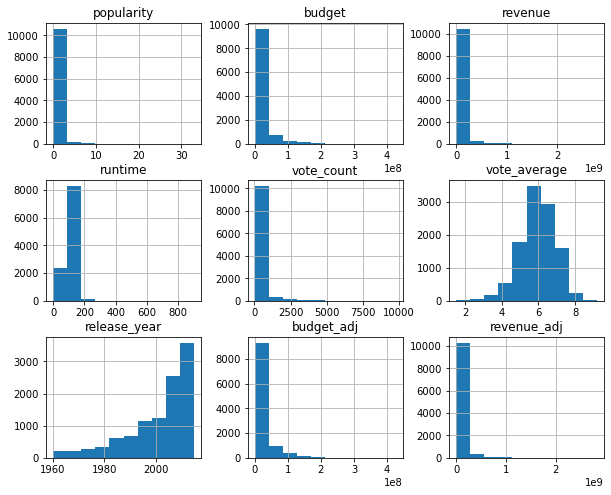

In [47]:
# visualising the descriptive statistics from above

df.hist(figsize=(10, 8))

> We can see that half of the movies in the database were released after 2006 with at least 75% of them being released after year 2011. The oldest movie was release in 1960 and the latest one in 2015.

> A vast majority of the films (at least 2/3) are not popular with a score of less than 1.00. While there are some outliers with popularity ranking between 10 and 33 points.

> Budget wise mean value is misleading since half of the movies had a very low (or zero) budget. Only a quarter of the movies have a budget of over 2 billions.
> Similar trend can be spotted for revenue generated.
> Note: we should rely on "budget_adj" and "revenue_adj" columns when we analyse budget and revenue, since those columns consider inflation of the USD over years.

> Now we can start the analysis of the trends. 

### Research Question 1 
> Q1) Is budget associated with popularity? In other words, had movies with higher budget received a higher popularity score?

> Before we start the exploratory analysis, we can create a function that will help us to plot the results. We can simply call the funtion with the appropriate parameters for each research question.

In [62]:
# a function for plotting graphs of various kinds with correlation

def plot_analysis(data_frame, x_axis, y_axis, plt_kind, x_label, y_label, title, grid, png_name):
    data_frame.plot(x=x_axis, y=y_axis, kind=plt_kind, figsize=(12, 8));
    plt.xlabel(x_label);
    plt.ylabel(y_label);
    plt.title(title);
    plt.grid(grid, color='grey');
    plt.savefig(png_name);

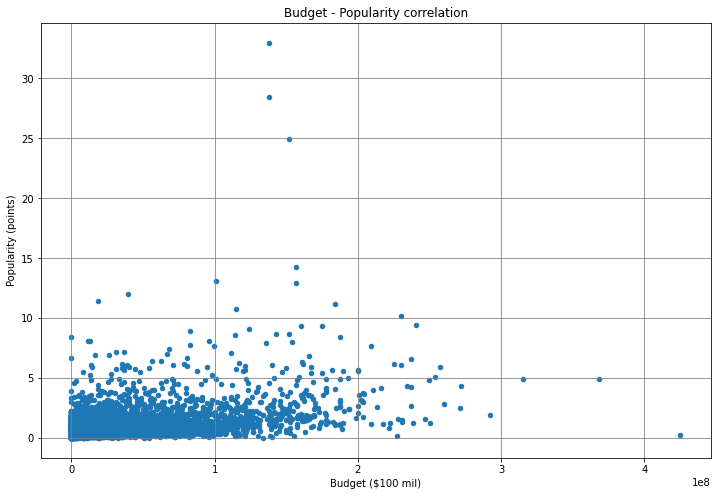

In [63]:
# to use the plotting function, we need to provide appropriate parameters for each correlation analysis: 
# df for data_frame, budget for x-axis, popularity for y-axis, give labels and a title, and save the plot as a png for the report.

plot_analysis(df, 'budget_adj', 'popularity', 'scatter', 'Budget ($100 mil)', 'Popularity (points)', 'Budget - Popularity correlation', True, "Q1_plot.png")

> We can see that high budget does not always guarantee a higher popularity rating. Overall, there are movies with an exceptionally high budget of over 300 millions, but they have a rather average popularity of around 5 points.The most popular movie had a relatively low budget of around 160 millions. 

> We can check the trends for outliers with very high popularity scores and budgets.

In [50]:
# checking data with extremely high popularity of over 15 points

df.query('popularity > 15')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,1.379999e+08,3.481613e+08
629,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,6498,8.0,2014,1.519800e+08,5.726906e+08


In [51]:
# checking data with extremely high budget of over $300 mil

df.query('budget_adj >= 3e8')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.250540,425000000,11087569,The Warrior's Way,Sngmoo Lee,100,74,6.4,2010,4.250000e+08,1.108757e+07
3375,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,136,3180,6.3,2011,3.683713e+08,9.904175e+08
7387,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Gore Verbinski,169,2626,6.8,2007,3.155006e+08,1.010654e+09


> The most popupar movies "Jurassic World", "Mad Max: Fury Road", and "Interstellar" had a popularity ranking above 15. They all had an average budget of around 150-165 millions.

> At the same time, the movies with the highest budget "The Warrior's Way", and 2 movies of "The Pirates of the Caribbean" had a rather low popularity ranking.

### Conclusion for Question 1 
> There is no direct correlation between a movie's budget and its success.

### Research Question 2
> Q2) Had the release year affected the revenue? Had older or newer movies generated higher revenues?

Text(0.5, 1.0, 'Mean Revenue for each Release Year')

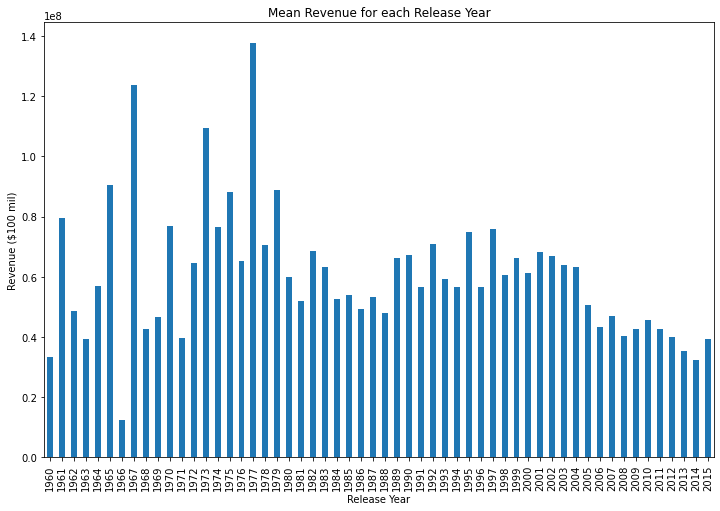

In [52]:
# visualising mean values of revenue groupped by year of release

df.groupby('release_year').revenue_adj.mean().plot(kind='bar', figsize=(12, 8))
plt.xlabel('Release Year')
plt.ylabel('Revenue ($100 mil)')
plt.title('Mean Revenue for each Release Year')

> If we take a mean value for all movies released in a certain year, it seems like the 1977 was the most profitable year for cinematography. The mean values of the revenue year-wise gives an impression it had flactuated throughout the history of movie making. However, it is possible there are some movies with exceptionally low/high revenues, thus bar chart is not the best option for the analysis.

> In this correlation using scatter plot over histagram is preffered to avoid misconception due to rare outliers.

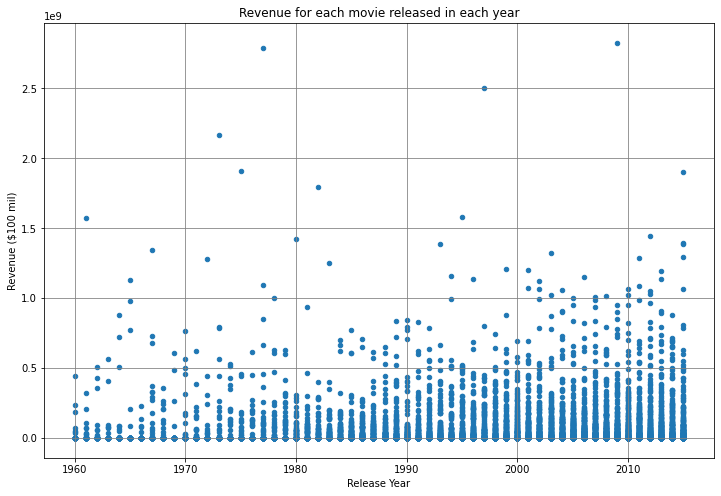

In [64]:
# plotting release year - revenue correlation of scatter ploy kind

plot_analysis(df, 'release_year', 'revenue_adj', 'scatter', 'Release Year', 'Revenue ($100 mil)', 'Revenue for each movie released in each year', True, "Q2_plot.png")

> The plot is slightly scewed to the left, meaning that the most recent movies have generated more revenue. However there are a few outliers among older movies. Note: we should use revenue_adj to eliminate inflation over the years.

In [55]:
# checking data with an exceptionally high revenue of over $1 billion

df.query('revenue_adj > 1e9')

,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,1.379999e+08,1.392446e+09
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,2947,7.3,2015,1.747999e+08,1.385749e+09
8,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,91,2893,6.5,2015,6.807997e+07,1.064192e+09
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,141,4304,7.4,2015,2.575999e+08,1.292632e+09
1329,12.037933,11000000,775398007,Star Wars,George Lucas,121,4428,7.9,1977,3.957559e+07,2.789712e+09
1334,1.104816,20000000,303788635,Close Encounters of the Third Kind,Steven Spielberg,135,600,7.0,1977,7.195562e+07,1.092965e+09
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,8458,7.1,2009,2.408869e+08,2.827124e+09
1921,5.572950,200000000,1025467110,Alice in Wonderland,Tim Burton,108,2853,6.3,2010,2.000000e+08,1.025467e+09
1930,2.711136,200000000,1063171911,Toy Story 3,Lee Unkrich,103,2924,7.5,2010,2.000000e+08,1.063172e+09


> There are 44 exceptional outliers with a revenue of over 1 billion. All these outliers were released in various years. Interestingly, the top 5 profitable movies were released in 2015, what follows a general trend of left-skewed plot.

### Conclusion for Question 2
> There is an overall positive correlation between a release year and movie's revenue with some outliers. Newer movies generated more revenue.

### Research Question 3
> Q3) Had runtime affected revenue? Had shorter or longer movies produced higher revenues?

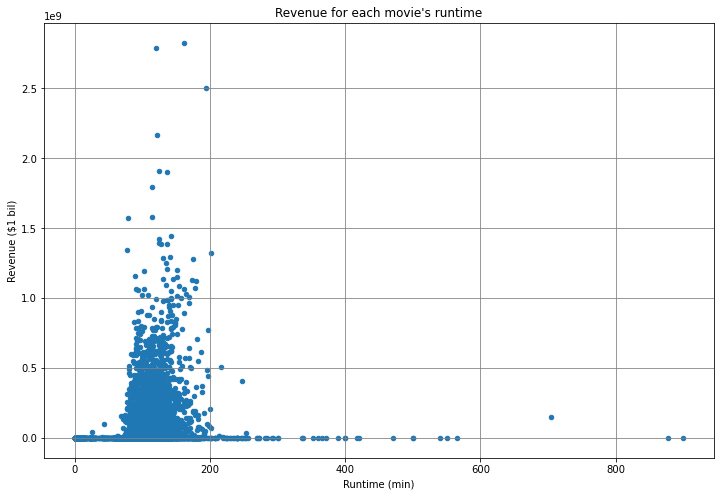

In [65]:
# plotting runtime - revenue correlation

plot_analysis(df, 'runtime', 'revenue_adj', 'scatter', 'Runtime (min)', 'Revenue ($1 bil)', 'Revenue for each movie\'s runtime', True, "Q3_plot.png")

> It's tough to see a clear trend, let's try to filter out extremely long movies of over 250 minutes

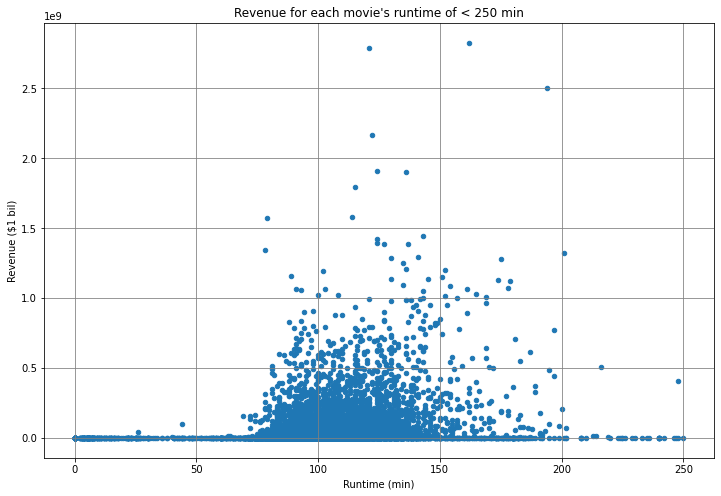

In [67]:
# visualising the same correlation as above for movies with runtime of < 250 min

df_runtime_250 = df.query('runtime <= 250')
plot_analysis(df_runtime_250, 'runtime', 'revenue_adj', 'scatter', 'Runtime (min)', 'Revenue ($1 bil)', 'Revenue for each movie\'s runtime of < 250 min', True, "Q3_plot_less_250.png")

> There's still a lot of movies with a zero revenue and some outliers, let's try to exclude them too

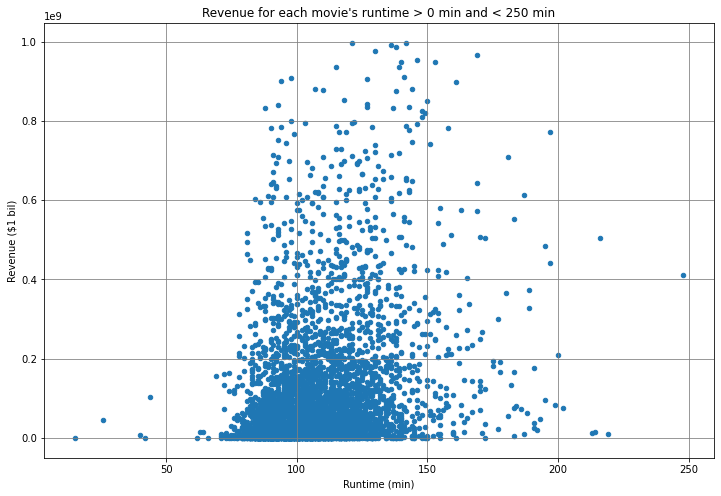

In [68]:
# visualising the same correlation as above for movies with runtime of > 0 min and < 250 min

df_non_zero_and_avg_rev = df_runtime_250.query('revenue_adj > 0 & revenue_adj < 1e9')
plot_analysis(df_non_zero_and_avg_rev, 'runtime', 'revenue_adj', 'scatter', 'Runtime (min)', 'Revenue ($1 bil)', 'Revenue for each movie\'s runtime > 0 min and < 250 min', True, "Q3_plot_0_250.png")

> If we look at a general trend, we can see something resembling a normal distribution with a mean around 130 minutes.

> Now we can check trends for the movies with a revenue over 1 billion and with zero venue.

In [69]:
# checking runtime statistics for movies with revenue of over $1 billion

df.query('revenue_adj > 1e9')['runtime'].describe()

count     44.000000
mean     136.181818
std       29.769090
min       78.000000
25%      119.500000
50%      136.000000
75%      154.750000
max      201.000000
Name: runtime, dtype: float64

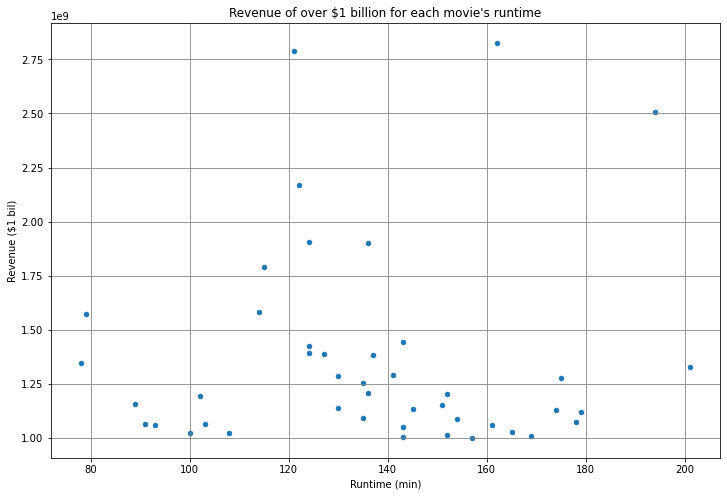

In [70]:
# visualising the same correlation as above for movies with revenue of over $1 billion

df_above_bil = df_runtime_250.query('revenue_adj > 1e9')
plot_analysis(df_above_bil, 'runtime', 'revenue_adj', 'scatter', 'Runtime (min)', 'Revenue ($1 bil)', 'Revenue of over $1 billion for each movie\'s runtime', True, "Q3_plot_over_1bil.png")

> For movies with revenue > 1 billion: no correlation with runtime

In [71]:
# checking runtime statistics for movies with revenue of $0

df.query('revenue_adj == 0')['runtime'].describe()

count    5973.000000
mean       97.399632
std        36.267830
min         0.000000
25%        88.000000
50%        95.000000
75%       106.000000
max       900.000000
Name: runtime, dtype: float64

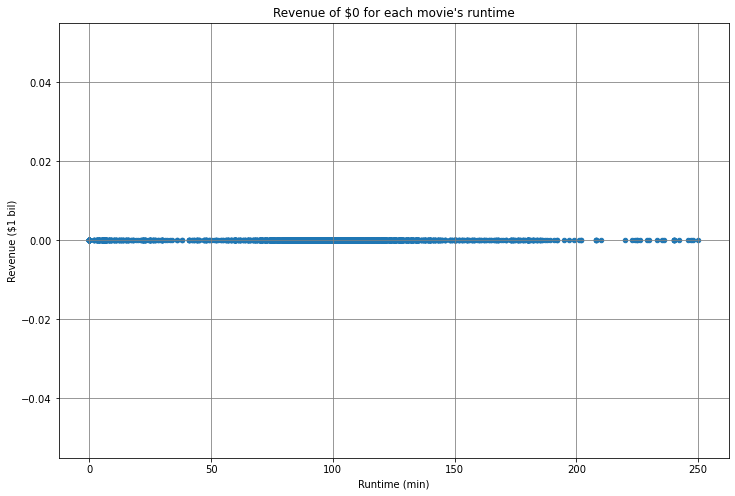

In [73]:
# visualising the same correlation as above for movies with revenue of $0 

df_zero_rev = df_runtime_250.query('revenue_adj == 0')
plot_analysis(df_zero_rev, 'runtime', 'revenue_adj', 'scatter', 'Runtime (min)', 'Revenue ($1 bil)', 'Revenue of $0 for each movie\'s runtime', True, "Q3_plot_zero_rev.png")

> For movies with a zero revenue: it is likely those movies have never been released, thus all of them have a zero runtime.

### Conclusion for Question 3
> There is a general trend with normal distribution for movies with a non-zero revenue and revenue below 1 billion. Some outliers also exist.

<a id='conclusions'></a>
## Conclusions

> We have performed a research for 3 questions about the tmbd movies dataset. Prior to the research we have dropped some unreleated columns and rows with missing values, and removed 1 duplicate.

> We found out that high budget allocated to a movie does not guarantee a good popularity score. We have also discovered that movies that were released the latest had a higher revenue (considering inflation rates). There is also an interesting finding that runtime follows a normal distribution with a mean at around 130 minutes. For the analysis we excluded outliers with extremely high/low/zero values.  

<a id='limitations'></a>
### Limitations

> The project was based on the analysis of the numeric values. Further analysis could be performed with the dropped categorical values such as "director", "genres", "production companies", "release date". For example, we could check which director had the largest number of successful movies, or which production company generated the most revenue, or which genre was the most popular in each season of the year based on the release date.  

> There are many movies with a zero or nearly zero revenue, budget, and runtime. It's possible those movies were approved for production, but never made it due to unknown factors. We also don't know if zero value means that it was missing and was filled in with zero, or if it was correctly represented. 

> For Q1 and Q2, the descriptive statistics was used, since the whole population was analysed (exluding the dropped rows of 1 duplicate and NaN directors). However, some extreme outliers were disregarded. For Q3, both descriptive and inferential statistics were used. First, the whole population was analysed, and then samples of two outliers were taken into account: for extremely large revenues and for zero revenues. 